# Формула Шерман-Моррисона и трехдиагональная матрица

Пусть ${\bf A} \rightarrow {\bf A} + {\bf u} \otimes {\bf v}$


In [2]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Разберем пример, уравнение пружинного маятника с внешней силой: 
$$ \ddot x(t) + k^2 x(t) = f(t) $$ 
При этом будем считать функцию $f(t)$ переодичной с периодом $T$. Очевидно, что устоявшееся решение уравнения также должно быть периодично. Ищем решение на интервале $t = (0, T)$.

Для численного расчета ввдем равномерную сетку из $N$ узлов:
$$t_n = \frac{n}{N} T$$
$$x_n = x(t_n) $$
$$f_n = f(t_n) $$
$$\ddot x_n = \frac{x_{n+1} - 2x_n + y_{x-1}}{\Delta t^2} $$





Уравнение на сетке перепишется в виде:
$$ \frac{x_{n+1} - 2x_n + x_{n-1}}{\Delta t^2} + k^2 x_n = f_n $$
$$ \frac{1}{\Delta t^2}x_{n+1} + \left(k^2 - \frac{2}{\Delta t^2} \right) x_n + \frac{1}{\Delta t^2}x_{n-1} = f_n $$
Или введя обозначения $\alpha = k^2 \Delta t^2 - 2$ и $F_n = f_n \Delta t^2$
$$ x_{n+1} + \alpha x_n + x_{n-1} = F_n $$
для $n = (1,N-2)$.




Из граничных условий получаем уравнения для $x_0$ и $x_{N-1}$:
$$ x_{1} + \alpha x_0 + x_{N-1} = F_0 $$
$$ x_{0} + \alpha x_{N-1} + x_{N-2} = F_{N-1} $$


Все вместе это можно записать в матричном виде:
$$ 
\begin{pmatrix} 
    \alpha & 1 & 0 & 0 & \dots & 0 & 0 & 1 \\
    1 & \alpha & 1 & 0 & \dots & 0 & 0 & 0 \\
    0 & 1 & \alpha & 1 & \dots & 0 & 0 & 0 \\
    0 & 0 & 1 & \alpha & \dots & 0 & 0 & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & 0 & \dots & \alpha & 1 & 0 \\ 
    0 & 0 & 0 & 0 & \dots & 1 & \alpha & 1 \\ 
    1 & 0 & 0 & 0 & \dots & 0 & 1 & \alpha \\ 
\end{pmatrix} 
\begin{pmatrix} 
    x_0 \\
    x_1 \\
    x_2 \\
    x_3 \\
    \vdots \\
    x_{N-3} \\
    x_{N-2} \\
    x_{N-1} \\
\end{pmatrix}
=
\begin{pmatrix} 
    F_0 \\
    F_1 \\
    F_2 \\
    F_3 \\
    \vdots \\
    F_{N-3} \\
    F_{N-2} \\
    F_{N-1} \\
\end{pmatrix}
$$


Полученная матрица очень похожа на трехдиаганальную (для решения которых существуют очень эффективные методы, см. scipy.linalg.solve_banded). Но она отличается наличием ненулевых элементах в углах матрицы, из-за чего напрямую применить кк ней быстрые методы нельзя.

На помощь приходит [формула Шерман-Моррисона](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula). Пусть есть матрица $A$, решение для которой мы можем посчитать быстро. Пусть новая матрица $B = A + {\bf uv}^T$ отличается от известной добавкой, представимой в виде произведения двух векторов ${\bf uv}^T$.

Тогда, чтобы получить решение уравнения
$$ (A + {\bf uv}^T) {\bf x} = {\bf f} $$
достаточно получить $x_0$ и $y$ из уравнений:
$$ A {\bf x}_0 = {\bf f} \; A {\bf y} = {\bf u} $$
тогда решение исходного уравнения:
$$ {\bf x} = {\bf x}_0 - \frac{({\bf v} \cdot {\bf x}_0 )}{1 + ({\bf v} \cdot {\bf y})} {\bf y} $$


Несложно получить, что ветора $\bf u$ и $\bf v$ должны иметь вид:
$$
{\bf u} = 
\begin{pmatrix} 
    \gamma \\
    0 \\
    \vdots \\
    0 \\
    1 \\
\end{pmatrix}
\qquad 
{\bf v} = 
\begin{pmatrix} 
    1 \\
    0 \\
    \vdots \\
    0 \\
    1/\gamma \\
\end{pmatrix}
\qquad
{\bf u v}^T = 
\begin{pmatrix} 
    \gamma & 0 & \dots & 0 & 1 \\
    0 & 0 &\dots & 0 & 0 \\
    \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & \dots & 0 & 0 \\ 
    1 & 0 & \dots & 0 & 1/\gamma \\ 
\end{pmatrix} 
$$
где $\gamma$ произвольное число.

Тогда матрица $A$ в нашем случае:
$$
A = 
\begin{pmatrix} 
    \alpha - \gamma & 1 & 0 & 0 & \dots & 0 & 0 & 0 \\
    1 & \alpha & 1 & 0 & \dots & 0 & 0 & 0 \\
    0 & 1 & \alpha & 1 & \dots & 0 & 0 & 0 \\
    0 & 0 & 1 & \alpha & \dots & 0 & 0 & 0 \\
    \vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
    0 & 0 & 0 & 0 & \dots & \alpha & 1 & 0 \\ 
    0 & 0 & 0 & 0 & \dots & 1 & \alpha & 1 \\ 
    0 & 0 & 0 & 0 & \dots & 0 & 1 & \alpha - 1/\gamma \\ 
\end{pmatrix} 
$$


In [3]:
k = 100
N = 100000
T = 2 * np.pi

dt = T/N
t = np.linspace(0, T-dt, N)
f = np.sin(t) + np.sin(3*t) + np.cos(5*t)

In [28]:
alpha = k**2 * dt**2 - 2
F = f*dt**2

In [29]:
gamma = -alpha

u = np.zeros(N)
u[0] = gamma
u[-1] = 1

v = np.zeros(N)
v[0] = 1
v[-1] = 1/gamma

In [26]:
d0 = alpha * np.ones(N)
d0[0] = d0[0] - gamma
d0[N-1] = d0[N-1] - 1/gamma
du = np.concatenate(([0], np.ones(N-1)))
dl = np.concatenate((np.ones(N-1), [0]))

A_band = np.concatenate(([du], [d0], [dl]), axis = 0) # see scipy.linalg.solve_banded doc

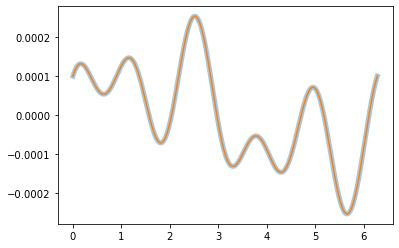

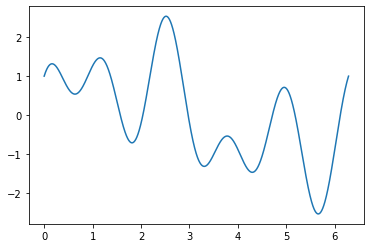

In [37]:
x0 = la.solve_banded((1, 1), A_band, F)
y = la.solve_banded((1, 1), A_band, u)
x = x0 - np.dot(v, x0)/(1 + np.dot(v, y)) * y

x_exact = np.sin(t)/(-1+k**2) + np.sin(3*t)/(-3**2+k**2) + np.cos(5*t)/(-5**2+k**2)

plt.figure(1)
plt.plot(t, x_exact, alpha = 0.4, lw=5)
plt.plot(t, x)


plt.figure(2)
plt.plot(t, f)